### Importación de datos



In [34]:
#IMPORTS
import matplotlib.pyplot as plt
import pandas as pd

In [35]:


url0 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
urls = [url0,url1,url2,url3]
tiendas = [pd.read_csv(url) for url in urls]
tiendas[0].head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [11]:
#Calcular ingreso total de cada tienda
ingresos = [] 
for tienda in tiendas:
    ingresos.append(sum(tienda['Precio']))
ingresos

[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]

# 2. Ventas por categoría

Lista de diccionarios : 
dict_items([('Muebles', 464), ('Electrónicos', 447), ('Juguetes', 323), ('Electrodomésticos', 311), ('Deportes y diversión', 283), ('Instrumentos musicales', 181), ('Libros', 172), ('Artículos para el hogar', 170)])


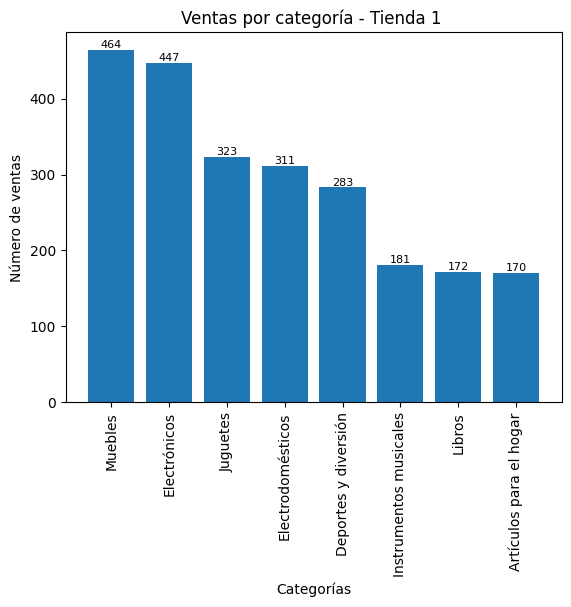

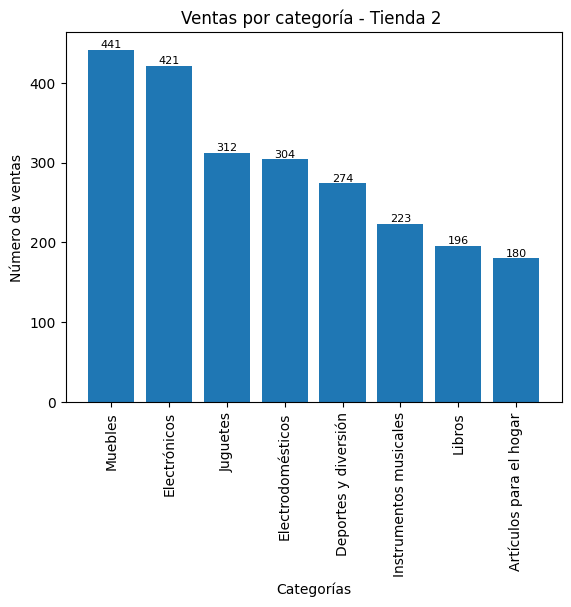

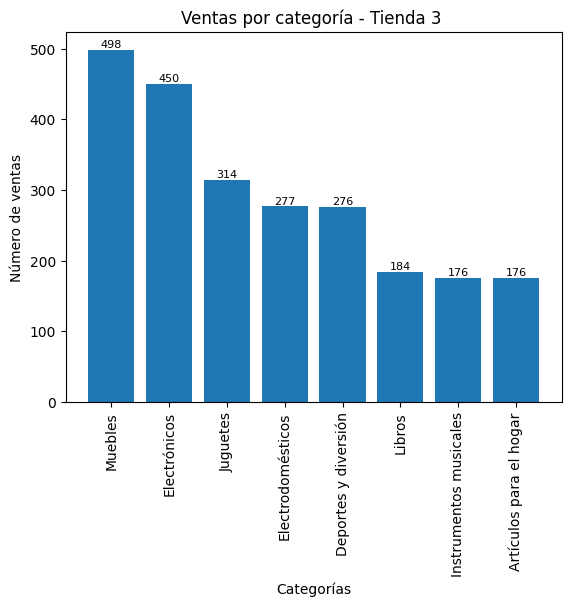

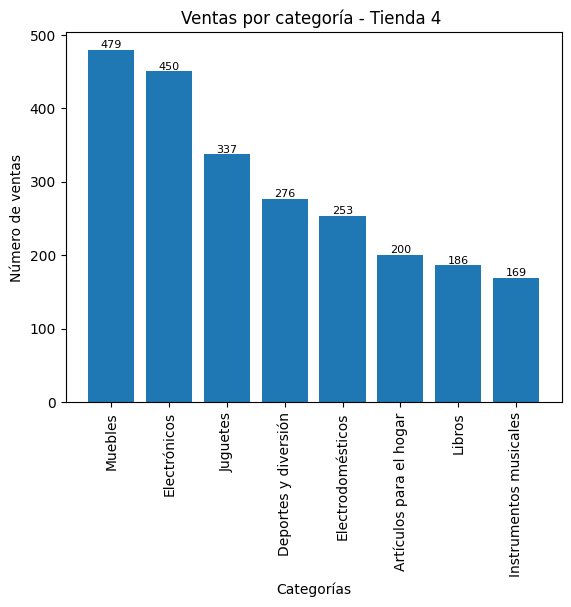

"\nimport matplotlib.pyplot as plt\n\nD = {u'Label1':26, u'Label2': 17, u'Label3':30}\nplt.bar(*zip(*D.items())) \nplt.show()\n"

In [ ]:
#cantidad de productos vendidos por categoría, mostrar de mayor a menor por tienda, para ver la cateoría más popular en cada tienda

#una lista de diccionarios, donde cada diccionario tiene las categorías y cantidad de ventas en 1 tienda, entonces necesitas una lista para tener las 4 tiendas
categoria = []

for tienda in tiendas:
    diccionario = {}
    for tipo_producto in tienda['Categoría del Producto']:
        if tipo_producto in diccionario:
            diccionario[tipo_producto] += 1
        else:
            diccionario[tipo_producto]=0
    diccionario_descendente = sorted(diccionario.items(), key=lambda x:x[1], reverse=True) #en lo del key va el criterio bajo el que se va a ordenar, en este caso es de acuerdo al valor del diccionario que está en la posición 1 (lo de lambda y eso es solo una función anónima)
 
    categoria.append(dict(diccionario_descendente))
   #print(f'{tienda} \n')
print("Lista de diccionarios : ")
#print(categoria)

#print(tiendas.columns) para ver los nombres de las columnas
print(categoria[0].items()) #el items te da tuplas hechas de key y valor
#con zip(*tupla) pones los valores en listas, las categorias en una y sus repeticiones en otra

for  i, categoria_grafica in enumerate(categoria):
    categorias, valores = zip(*categoria_grafica.items())
    plt.bar(categorias, valores)
    plt.xticks(rotation=90)
    plt.title(f"Ventas por categoría - Tienda {i+1} ")
    plt.xlabel("Categorías")
    plt.ylabel("Número de ventas")
    
    for x, y in zip(categorias, valores):
        plt.text(x, y + 0.2, str(y), ha='center', va='bottom', fontsize=8)

    plt.show()

'''
import matplotlib.pyplot as plt

D = {u'Label1':26, u'Label2': 17, u'Label3':30}
plt.bar(*zip(*D.items())) 
plt.show()
'''

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda